In [1]:
import pandas as pd
import numpy as np
import os
import matplotsoccer
import math
import plotly.express as px

In [2]:
# constants

PATH: str = "../data/spadl_format/"
LEAGUES: list[str] = ["England", "Spain", "France", "Italy", "Germany"]

In [3]:
teams_df = pd.read_json("../data/wyscout/teams/teams.json")
teams_df

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
...,...,...,...,...,...,...
137,Las Rozas,Spain,1598,Spain,"{'name': 'Spain', 'id': 724, 'alpha3code': 'ES...",national
138,Beograd,Serbia,17322,Serbia,"{'name': 'Serbia', 'id': 688, 'alpha3code': 'S...",national
139,Bern,Switzerland,6697,Switzerland,"{'name': 'Switzerland', 'id': 756, 'alpha3code...",national
140,Warszawa,Poland,13869,Poland,"{'name': 'Poland', 'id': 616, 'alpha3code': 'P...",national


In [4]:
df_dict = {}
if not os.path.exists("../data/processed/"):
    os.mkdir("../data/processed")
for league in LEAGUES:

    df = pd.read_csv(f"{PATH}{league}.csv", index_col=0)

    # remove not used columns
    df.drop(["original_event_id", "result_id", "bodypart_name", "bodypart_id"], inplace=True, axis=1)

    df_dict[league] = df

In [5]:
all_df = pd.concat([df for df in df_dict.values()])
all_df[all_df["type_id"] == 0]


,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,action_id,type_name,result_name,player_name
0,2499719,1,2.758649,1609,25413,51.45,34.68,32.55,14.96,0,0,pass,success,A. Lacazette
1,2499719,1,4.946850,1609,370224,32.55,14.96,53.55,17.00,0,1,pass,success,R. Holding
2,2499719,1,6.542188,1609,3319,53.55,17.00,36.75,19.72,0,2,pass,success,M. Özil
3,2499719,1,8.143395,1609,120339,36.75,19.72,43.05,3.40,0,3,pass,success,Mohamed Elneny
4,2499719,1,10.302366,1609,167145,43.05,3.40,75.60,8.16,0,4,pass,success,Bellerín
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389141,2517044,2,2804.460822,2463,16843,33.60,43.52,33.60,25.84,0,1143,pass,success,D. Heintz
389142,2517044,2,2807.540961,2463,275384,33.60,25.84,69.30,8.16,0,1144,pass,success,Jorge Meré
389143,2517044,2,2810.604426,2463,15194,69.30,8.16,93.45,33.32,0,1145,pass,fail,M. Risse
389145,2517044,2,2812.356433,2451,14917,11.55,34.68,14.70,34.00,0,1147,pass,success,R. Knoche


In [7]:
fig = px.histogram(all_df, x="type_name", labels={"type_name": "Tipo de ação"})
fig.update_layout(yaxis_title="Quantidade de ações")
fig.write_image("../report/images/action_distribution.png")

In [10]:
all_df_goals = all_df[(all_df["type_name"] == "shot") & (all_df["result_name"] == "success")]
all_df_goals = all_df_goals.filter(["start_x", "start_y"])
all_df_goals

,start_x,start_y
34,92.40,40.12
58,100.80,32.64
420,98.70,31.28
681,96.60,34.00
826,96.60,31.28
...,...,...
388012,89.25,31.28
388368,99.75,43.52
388714,95.55,36.04
388890,95.55,39.44


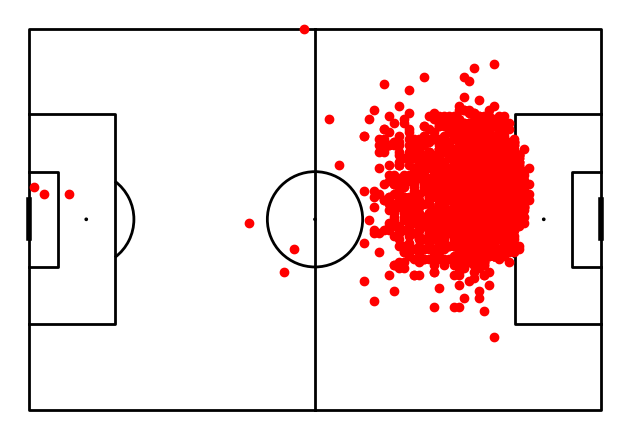

In [22]:
from mplsoccer.pitch import VerticalPitch, Pitch
# esse pitch ta 120 porm 80
pitch = Pitch(line_color="black", half=False)
fig, ax = pitch.draw()
ax.scatter(all_df_goals["start_x"], all_df_goals["start_y"], color='red', label='Scatter Points')